In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2022-06-19 15:54:46.999198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-19 15:54:46.999227: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.5.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.6


In [4]:
cellprop = pd.read_csv('../cell_prop_matrix.csv', index_col=0)
# cellprop = pd.DataFrame.transpose(cellprop)
cellprop

,CM,CMP,Ery,GMP,HEC&Ery,HPC,Immature PSC,LPM,Mk,MkP,Mono,NC,NE,TB-like,VEC,YSE
sample,,,,,,,,,,,,,,,,
D08,48.0,0.0,600.0,0.0,173.0,98.0,239.0,0.0,0.0,12.0,17.0,4.0,10.0,578.0,1274.0,83.0
D15,120.0,281.0,2694.0,198.0,112.0,1103.0,1.0,51.0,358.0,540.0,182.0,254.0,1813.0,613.0,38.0,6.0
D18,4.0,690.0,4509.0,527.0,82.0,1464.0,2.0,445.0,1240.0,1491.0,226.0,4.0,10.0,87.0,12.0,3.0


In [5]:
cellprop_perc = cellprop.divide(cellprop.sum(axis=1), axis=0)
cellprop_perc

,CM,CMP,Ery,GMP,HEC&Ery,HPC,Immature PSC,LPM,Mk,MkP,Mono,NC,NE,TB-like,VEC,YSE
sample,,,,,,,,,,,,,,,,
D08,0.015306,0.000000,0.191327,0.000000,0.055166,0.031250,0.076212,0.000000,0.000000,0.003827,0.005421,0.001276,0.003189,0.184311,0.406250,0.026467
D15,0.014347,0.033596,0.322095,0.023673,0.013391,0.131875,0.000120,0.006098,0.042802,0.064562,0.021760,0.030368,0.216762,0.073290,0.004543,0.000717
D18,0.000371,0.063913,0.417655,0.048814,0.007595,0.135606,0.000185,0.041219,0.114857,0.138107,0.020934,0.000371,0.000926,0.008059,0.001112,0.000278


In [6]:
my_colors = list(['#E73986', '#F885BC', '#477AB4', '#A45B30', '#ACE093', '#E23624', 
                  '#FA9F9A', '#2E2985', '#9B4D9E', '#41AF58', '#109D7A', '#DDC23D', 
                  '#EE9B32', '#62ACE0', '#BF9BC9', '#911740'])

<AxesSubplot:xlabel='sample'>

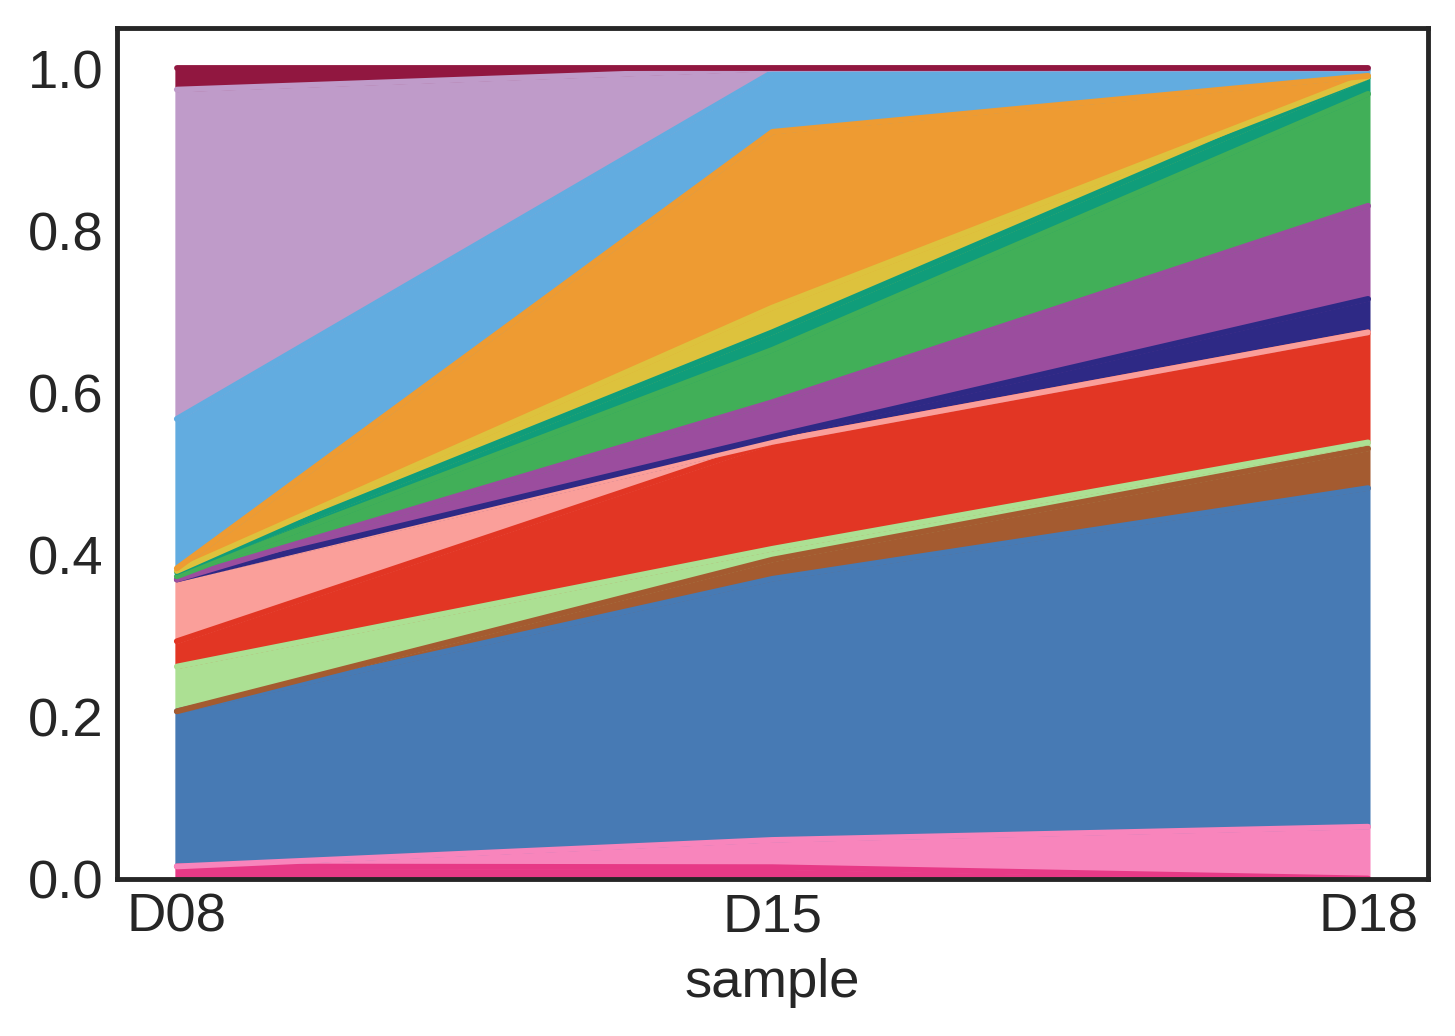

In [7]:
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["figure.dpi"] = 140
cellprop_perc.plot.area(stacked=True, legend=False, color=my_colors)